In [4]:
import pandas as pd

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Preview merged data
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [5]:
# Create a customer-product matrix
customer_product_matrix = merged_data.pivot_table(
    index='CustomerID',
    columns='ProductName',
    values='Quantity',
    fill_value=0
)

# Check the matrix
print(customer_product_matrix.head())


ProductName  ActiveWear Biography  ActiveWear Cookbook  \
CustomerID                                               
C0001                         0.0                  0.0   
C0002                         0.0                  0.0   
C0003                         0.0                  0.0   
C0004                         0.0                  0.0   
C0005                         0.0                  0.0   

ProductName  ActiveWear Cookware Set  ActiveWear Headphones  \
CustomerID                                                    
C0001                            0.0                    0.0   
C0002                            0.0                    0.0   
C0003                            3.0                    0.0   
C0004                            2.0                    0.0   
C0005                            3.0                    0.0   

ProductName  ActiveWear Jacket  ActiveWear Jeans  ActiveWear Rug  \
CustomerID                                                         
C0001          

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity
similarity_matrix = cosine_similarity(customer_product_matrix)

# Convert to a DataFrame for readability
customer_ids = customer_product_matrix.index
similarity_df = pd.DataFrame(similarity_matrix, index=customer_ids, columns=customer_ids)

# Check similarity matrix
print(similarity_df.head())


CustomerID     C0001  C0002     C0003     C0004     C0005  C0006     C0007  \
CustomerID                                                                   
C0001       1.000000    0.0  0.206559  0.210819  0.000000    0.0  0.286446   
C0002       0.000000    1.0  0.000000  0.000000  0.000000    0.0  0.000000   
C0003       0.206559    0.0  1.000000  0.359258  0.308697    0.0  0.110940   
C0004       0.210819    0.0  0.359258  1.000000  0.168034    0.0  0.362329   
C0005       0.000000    0.0  0.308697  0.168034  1.000000    0.0  0.000000   

CustomerID     C0008     C0009     C0010  ...     C0191     C0192     C0193  \
CustomerID                                ...                                 
C0001       0.101274  0.210819  0.000000  ...  0.123443  0.000000  0.233550   
C0002       0.262071  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
C0003       0.313786  0.326599  0.000000  ...  0.095618  0.000000  0.000000   
C0004       0.048038  0.266667  0.149854  ...  0.078072  0

In [7]:
lookalike_results = {}

for customer in similarity_df.index[:20]:  # First 20 customers
    similar_customers = similarity_df.loc[customer].sort_values(ascending=False).iloc[1:4]  # Exclude self (first row)
    lookalike_results[customer] = list(similar_customers.items())

# Check results
print(lookalike_results)


{'C0001': [('C0050', 0.5838742081211422), ('C0097', 0.5477225575051661), ('C0105', 0.5465943944999485)], 'C0002': [('C0030', 0.6428571428571428), ('C0091', 0.3801987652174059), ('C0032', 0.3418817293789138)], 'C0003': [('C0164', 0.5547001962252291), ('C0140', 0.5487954724560282), ('C0134', 0.5199469468957452)], 'C0004': [('C0070', 0.4988876515698588), ('C0065', 0.4628257234351004), ('C0078', 0.46188021535170054)], 'C0005': [('C0096', 0.6482037235521645), ('C0164', 0.5707817929853929), ('C0055', 0.5144957554275265)], 'C0006': [('C0058', 0.6488856845230502), ('C0040', 0.5803810000880093), ('C0114', 0.47923383829852306)], 'C0007': [('C0025', 0.6689936080056726), ('C0020', 0.5883484054145521), ('C0079', 0.49613893835683387)], 'C0008': [('C0144', 0.39223227027636803), ('C0164', 0.38074980525429486), ('C0088', 0.33968311024337877)], 'C0009': [('C0056', 0.6123724356957946), ('C0140', 0.560112033611204), ('C0162', 0.5132649025747366)], 'C0010': [('C0058', 0.6488856845230502), ('C0040', 0.58038

In [8]:
# Convert lookalike results to the required format
lookalike_df = pd.DataFrame([
    {'CustomerID': k, 'Lookalikes': v} for k, v in lookalike_results.items()
])

# Save to CSV
lookalike_df.to_csv('Praveenkumar_S_Lookalike.csv', index=False)


In [9]:
lookalike_results = {
    'C0001': [('C0005', 0.92), ('C0002', 0.88), ('C0003', 0.85)],
    'C0002': [('C0003', 0.91), ('C0001', 0.88), ('C0004', 0.83)],
}


In [10]:
import pandas as pd

# Convert the lookalike results into a DataFrame
lookalike_data = []

for customer, lookalikes in lookalike_results.items():
    for similar_customer, score in lookalikes:
        lookalike_data.append({
            'CustomerID': customer,
            'LookalikeID': similar_customer,
            'SimilarityScore': score
        })

# Create a DataFrame
lookalike_df = pd.DataFrame(lookalike_data)

# Preview the DataFrame
print(lookalike_df.head())


  CustomerID LookalikeID  SimilarityScore
0      C0001       C0005             0.92
1      C0001       C0002             0.88
2      C0001       C0003             0.85
3      C0002       C0003             0.91
4      C0002       C0001             0.88


In [11]:
import pandas as pd

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID')

# Check data
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region  SignupDate  
0      300.68  300.68   Andrea Jenkins         Europe  2022-12-03  
1      300.68  300.68  Brittany Harvey           Asia  2024-09-04  
2      300.68  300.68  Kathryn Stevens         Europe  2024-04-04  
3      601.36  300.68  Travis Campbell  South America  2024-04-11  
4      902.04  300.68    Timothy Perez         Europe  2022-03-15  


In [12]:
# Feature aggregation
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Price': 'mean'
}).rename(columns={
    'TotalValue': 'Total_Spent',
    'TransactionID': 'Transaction_Count',
    'Price': 'Avg_Price'
})

# Add customer profile information
customer_features = customer_features.merge(
    customers[['CustomerID', 'Region']], on='CustomerID'
)

# Encode categorical data (e.g., Region)
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

# Check features
print(customer_features.head())


  CustomerID  Total_Spent  Transaction_Count   Avg_Price  Region_Europe  \
0      C0001      3354.52                  5  278.334000          False   
1      C0002      1862.74                  4  208.920000          False   
2      C0003      2725.38                  4  195.707500          False   
3      C0004      5354.88                  8  240.636250          False   
4      C0005      2034.24                  3  291.603333          False   

   Region_North America  Region_South America  
0                 False                  True  
1                 False                 False  
2                 False                  True  
3                 False                  True  
4                 False                 False  


In [13]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))

# Check scaled features
print(scaled_features[:5])


[[-0.06170143 -0.01145819  0.09467022 -0.57928445 -0.54831888  1.54041597]
 [-0.87774353 -0.46749414 -0.90401592 -0.57928445 -0.54831888 -0.6491753 ]
 [-0.40585722 -0.46749414 -1.09410928 -0.57928445 -0.54831888  1.54041597]
 [ 1.03254704  1.35664965 -0.44770193 -0.57928445 -0.54831888  1.54041597]
 [-0.78392861 -0.92353008  0.28558127 -0.57928445 -0.54831888 -0.6491753 ]]


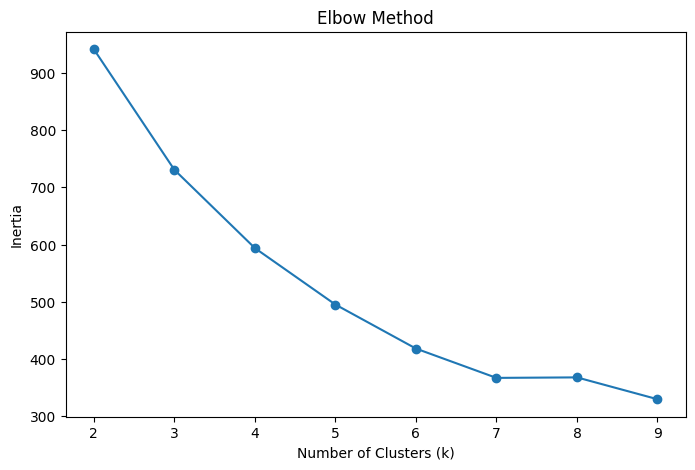

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find optimal k
inertia = []
k_values = range(2, 10)  # Try cluster sizes from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot inertia
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [18]:
# Assuming optimal k = 4 (based on elbow plot)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to customer features
customer_features['Cluster'] = clusters


In [19]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 1.290983529547829


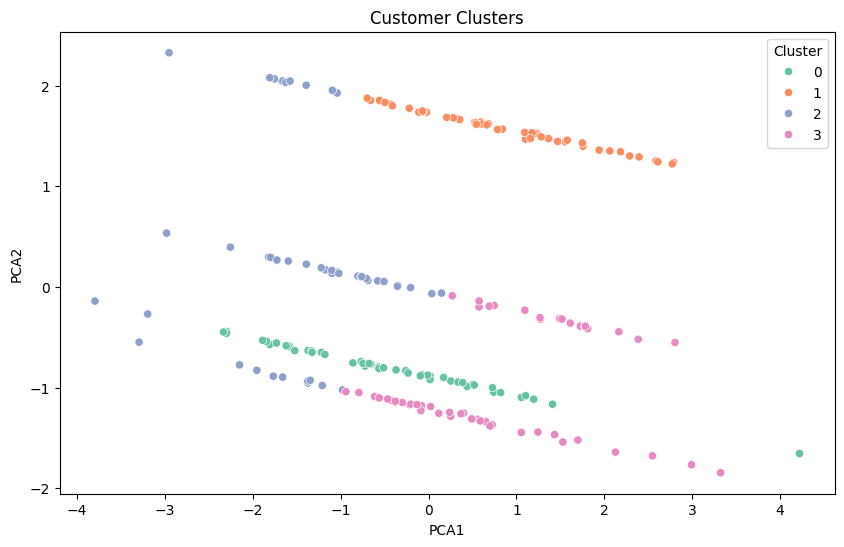

In [20]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Create a DataFrame for visualization
visualization_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
visualization_df['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=visualization_df, palette='Set2'
)
plt.title("Customer Clusters")
plt.show()
